## Multidimensional

In [5]:
import numpy as np
import matplotlib.pyplot as plt 
from   keras.models import Sequential, Model
from   keras.layers import Dense, Input
from   keras import optimizers
from   keras.optimizers import Adam

z = np.arange(0, 1, .0001)
x = z * np.sin(z * 30)
y = z * np.cos(z * 30)

# plotting
inputs = np.stack((x, y, z), axis=1)
inputs += np.random.normal(0, size=inputs.shape) * 0.002

inputs = (inputs - np.min(inputs)) / (np.max(inputs) - np.min(inputs))

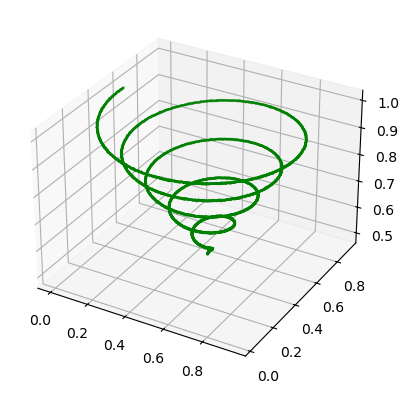

In [6]:
ax = plt.axes(projection ='3d')
ax.scatter3D(inputs[:, 0], inputs[:, 1], inputs[:, 2], color = "green", s=.5)
plt.show()

In [7]:

encoder = Sequential()
# encoder.add(Dense(1028, activation="relu"))
encoder.add(Dense(32, activation="relu"))
encoder.add(Dense(64, activation="relu"))
encoder.add(Dense(16, activation="relu"))
encoder.add(Dense(1))

decoder = Sequential()
decoder.add(Dense(16, activation="relu"))
decoder.add(Dense(64, activation="relu"))
decoder.add(Dense(32, activation="relu"))
# decoder.add(Dense(1028, activation="relu"))
decoder.add(Dense(3))

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss="mse")

In [8]:
from keras.callbacks import Callback

class EarlyStoppingByLossVal(Callback):
    def __init__(self, monitor='val_loss', value=0.00001, verbose=0, patience=0):
        super().__init__()
        self.monitor = monitor
        self.value = value
        self.verbose = verbose
        self.patience = patience 
        self.patience_count = 0

    def on_epoch_end(self, epoch, logs={}):
        current = logs.get(self.monitor)
        if current is None:
            warnings.warn("Early stopping requires %s available!" % self.monitor, RuntimeWarning)

        if current < self.value:
            if self.verbose > 0:
                print("Epoch %05d: early stopping THR" % epoch)
            if self.patience_count >= self.patience:
                self.model.stop_training = True
            self.patience_count += 1
        else:
            self.patience_count = 0

np.random.shuffle(inputs)

# callback = new_callback()# .EarlyStopping(monitor='loss', patience=5, min_delta=5e-10)
callback = EarlyStoppingByLossVal(monitor='val_loss', value=5e-4, verbose=1, patience=10)
history = autoencoder.fit(inputs, inputs, validation_split=.2, epochs=2000, batch_size=16, callbacks=[callback])

Epoch 1/2000


2023-12-06 10:19:52.415000: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:559] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-12-06 10:19:52.415990: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:624 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-12-06 10:19:52.432266: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:559] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-12-06 10:19:52.433207: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:624 : INTERNAL: libdevice not found at ./libdevice.10.bc
2023-12-06 10:19:52.449140: W tensorflow/compiler/xla/service/gpu/llvm_gpu_backend/gpu_backend_lib.cc:559] libdevice is required by this HLO module but was not found at ./libdevice.10.bc
2023-12-06 10:19:52.450096: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at xla_ops.cc:6

InternalError: Graph execution error:

Detected at node RMSprop/StatefulPartitionedCall_14 defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/tornado/platform/asyncio.py", line 195, in start

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/asyncio/base_events.py", line 607, in run_forever

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/asyncio/base_events.py", line 1922, in _run_once

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/asyncio/events.py", line 80, in _run

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_281894/2324509024.py", line 30, in <module>

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/engine/training.py", line 1130, in train_step

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 544, in minimize

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1223, in apply_gradients

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 652, in apply_gradients

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1253, in _internal_apply_gradients

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1345, in _distributed_apply_gradients_fn

  File "/home/finn/anaconda3/envs/aml311_tf_gpu/lib/python3.11/site-packages/keras/src/optimizers/optimizer.py", line 1340, in apply_grad_to_update_var

libdevice not found at ./libdevice.10.bc
	 [[{{node RMSprop/StatefulPartitionedCall_14}}]] [Op:__inference_train_function_2741]

In [ ]:
encoder.summary(), decoder.summary()

In [ ]:
reconstructed_point = autoencoder.predict(inputs)
ax = plt.axes(projection ='3d')
ax.scatter3D(reconstructed_point[:, 0], reconstructed_point[:, 1], reconstructed_point[:, 2], color = "green", s=.5)
plt.show()
